<a href="https://colab.research.google.com/github/kimdesok/Text_Classification_Clustering/blob/main/Semi_supervised_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Reference with the source code:  Jason Brownlee, Semi-Supervised Learning With Label Propagation by Jason Brownlee on December 30, 2020 in Python Machine Learning https://machinelearningmastery.com/semi-supervised-learning-with-label-propagation/

Size of X, y 1000 1000


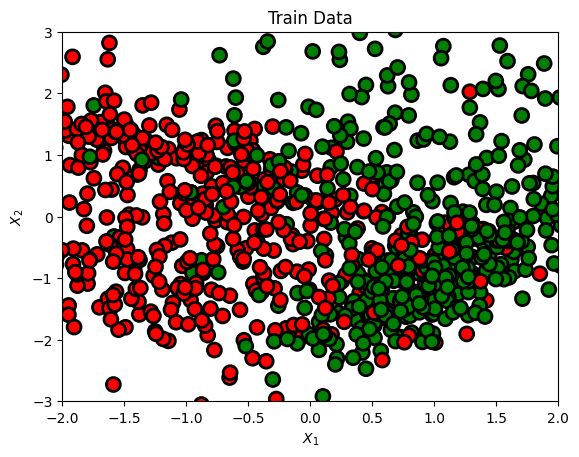

In [45]:
# Prepare semi-supervised learning dataset
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pylab as plt
import matplotlib

def scatter_plot(X, y, title="Scatter plot"):
  plt.title(title)
  color = ['red' if l == 0 else 'green' if l == 1 else 'blue' for l in y]
  plt.scatter(X[:,0], X[:,1], marker='o', c=color, \
            s=100, edgecolor="k", linewidth=2)
  plt.xlabel("$X_1$")
  plt.ylabel("$X_2$")
  plt.xlim(-2.0, 2.0)
  plt.ylim(-3.0, 3.0)
  plt.show()

# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, \
                           n_redundant=0, random_state=1)
print("Size of X, y", len(X), len(y))
scatter_plot(X, y, "Train Data")

Size of Train X, y 850 850
Test Set: 150 150
Further divide the train set into labelled and unlabelled
Labeled Train Set: (425, 2) (425,)
Unlabeled Test Set: (425, 2) (425,)


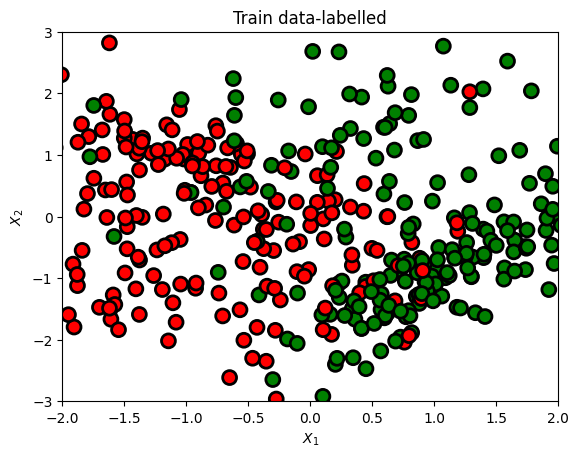

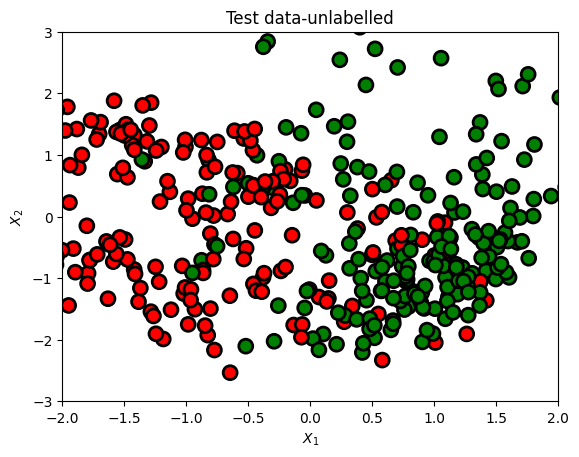

In [46]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1, stratify=y)
print("Size of Train X, y", len(X_train), len(y_train))
# summarize test set size
print('Test Set:', len(X_test), len(y_test))
#print(type(X_train))

# split train into labeled and unlabeled
X_train_lab, X_test_unlab, y_train_lab, y_test_unlab = train_test_split(X_train, y_train, test_size=0.50, random_state=1, stratify=y_train)

print('Further divide the train set into labelled and unlabelled')

# summarize training set size
print('Labeled Train Set:', X_train_lab.shape, y_train_lab.shape)
print('Unlabeled Test Set:', X_test_unlab.shape, y_test_unlab.shape)


scatter_plot(X_train_lab, y_train_lab, "Train data-labelled")

scatter_plot(X_test_unlab, y_test_unlab, "Test data-unlabelled")

## Intermediate goal : Labelling the unlabeled test data
>* with the help of the model trained with the labelled train data, of course.

In [47]:
# baseline performance on the semi-supervised learning dataset
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# define model
model = LogisticRegression()

# fit model on labeled dataset
model.fit(X_train_lab, y_train_lab)

# make predictions on hold out test set
yhat = model.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

# summarize score
print('Accuracy: %.3f' % (score*100))

Accuracy: 82.667


Element -1 occurs 425 time(s).
Element 0 occurs 212 time(s).
Element 1 occurs 213 time(s).


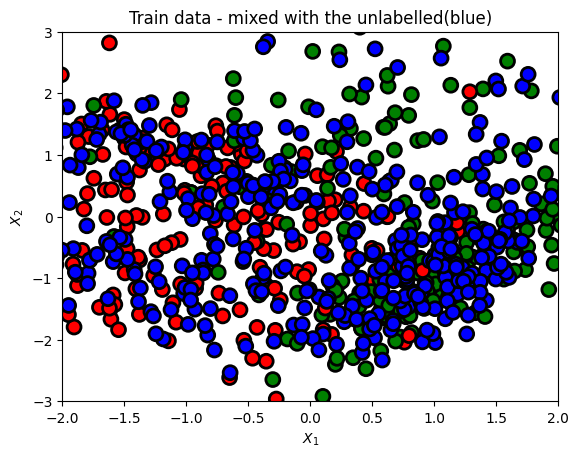

In [48]:
# Evaluate label propagation on the semi-supervised learning dataset
from numpy import concatenate
import numpy as np

from sklearn.semi_supervised import LabelPropagation

def count_unique(y_train_mixed):
  # Get the unique elements and their counts
  unique_elements, counts = np.unique(y_train_mixed, return_counts=True)

  # Print the unique elements and their counts
  for element, count in zip(unique_elements, counts):
    print(f"Element {element} occurs {count} time(s).")

# create the training dataset input, basically the original train set.
X_train_mixed = concatenate((X_train_lab, X_test_unlab))

# create "no label" for unlabeled data
nolabel = [-1 for _ in range(len(y_test_unlab))]

# recombine training dataset labels
y_train_mixed = concatenate((y_train_lab, nolabel))

count_unique(y_train_mixed)

scatter_plot(X_train_mixed, y_train_mixed, "Train data - mixed with the unlabelled(blue)")

Element 0 occurs 420 time(s).
Element 1 occurs 430 time(s).
Accuracy: 90.000


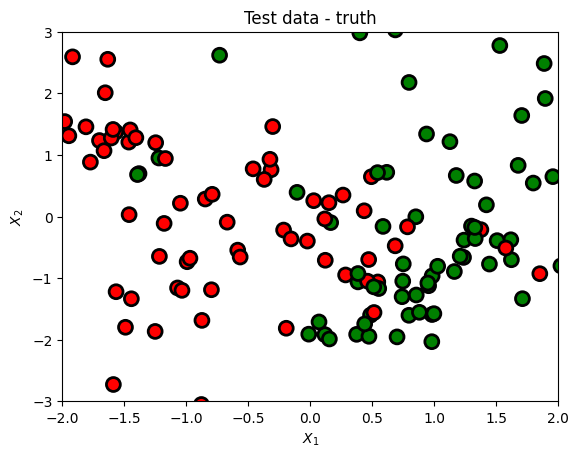

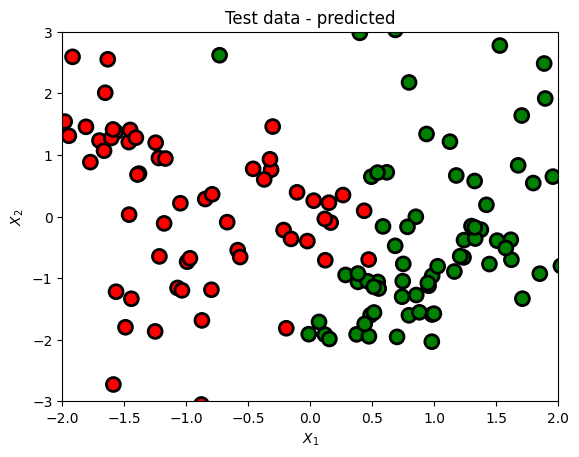

In [49]:
# define the model tha generates the labels of the unlabelled.
model = LabelPropagation()

# fit model on training dataset
model.fit(X_train_mixed, y_train_mixed)

count_unique(model.transduction_)

# make predictions on hold out test set
yhat = model.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

# summarize score
print('Accuracy: %.3f' % (score*100))

scatter_plot(X_test, y_test, "Test data - truth")
scatter_plot(X_test, yhat, "Test data - predicted")


In [50]:
# get labels for entire training dataset data
train_labels = model.transduction_
count_unique(train_labels)


Element 0 occurs 420 time(s).
Element 1 occurs 430 time(s).


Accuracy: 84.667


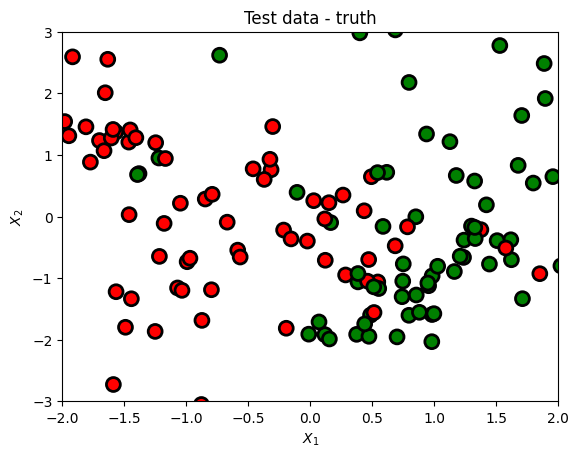

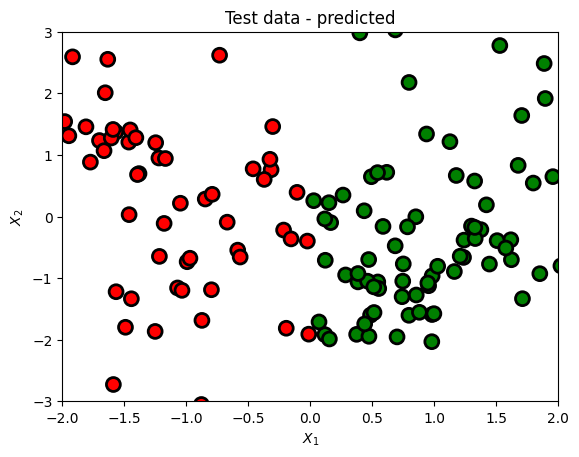

In [52]:
# define supervised learning model
model2 = LogisticRegression()

# fit supervised learning model on entire training dataset
model2.fit(X_train_mixed, train_labels)

# make predictions on hold out test set
yhat = model2.predict(X_test)

# calculate score for test set
score = accuracy_score(y_test, yhat)

# summarize score
print('Accuracy: %.3f' % (score*100))

scatter_plot(X_test, y_test, "Test data - truth")

scatter_plot(X_test, yhat, "Test data - predicted")